In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)


In [2]:
#present working directory pwd
pwd = os.getcwd()
filepath = os.path.join(pwd,"housing.csv")
filepath

'E:\\Youtube_Datascience\\housing.csv'

In [3]:
df1 = pd.read_csv(filepath)
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df1.shape

(20640, 10)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Inital Observations:

1. Data type of our features is mostly float which means they have floating numbers (1.22,3.335444 and etc..). There are other dtypes as well, but for noiw we are just focusing on these floats and objects.

2. Objects means they have string values in there

In [6]:
df1['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Always  Visualize data, Always !!!!

<AxesSubplot:>

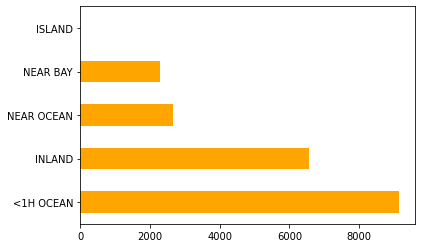

In [7]:
df1['ocean_proximity'].value_counts().plot(kind = "barh",color='orange')

In [8]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Always start you visualiztion on continous data types with histogram

<AxesSubplot:>

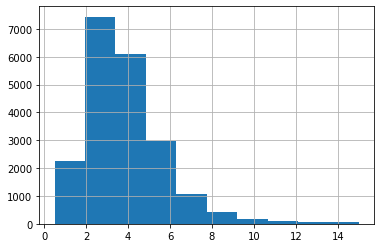

In [9]:
df1['median_income'].hist()

In [10]:
### Not giving proper visuals ? Lets explore it to the other level

In [11]:
df1['median_income_cat'] = pd.cut(df1['median_income'],
                                  bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                  labels=[1,2,3,4,5])
df1['median_income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: median_income_cat, dtype: int64

<AxesSubplot:>

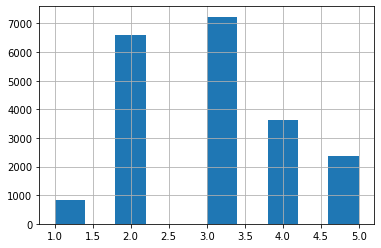

In [12]:
df1['median_income_cat'].hist()

In [13]:
y = df1['median_house_value']
X = df1.drop(['median_house_value'],axis =1)

In [14]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3


### Splitting Dataset: Why ???

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

<AxesSubplot:>

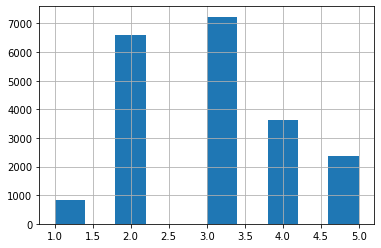

In [16]:
df1['median_income_cat'].hist()

<AxesSubplot:>

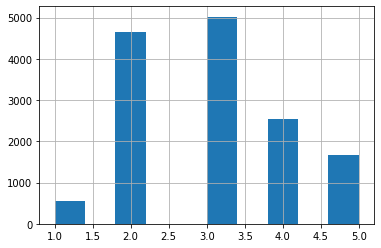

In [17]:
X_train['median_income_cat'].hist()

### Here we try to split in a way that it should follow the approximate distribution which means approximate distribution of data (after split) should be equivalent to otriginal data

#### In case it doesnot happening, we will be using stratified split to split the data instead or train test split

In [18]:
## lets try it for the sake of learning

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df1, df1["median_income_cat"]):
    strat_train_set = df1.loc[train_index]
    strat_test_set = df1.loc[test_index]

In [19]:
strat_test_set["median_income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: median_income_cat, dtype: float64

In [20]:
df1["median_income_cat"].value_counts() / len(df1)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: median_income_cat, dtype: float64

### Discover and visualize the data to gain insights

In [21]:
df1 = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

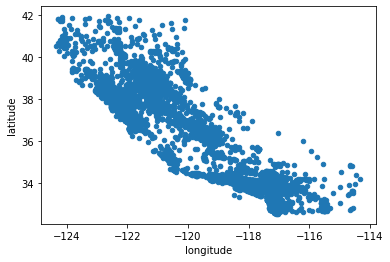

In [22]:
df1.plot(kind="scatter", x="longitude", y="latitude")

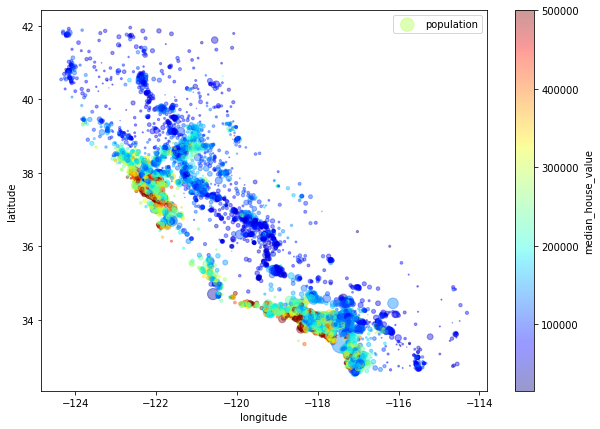

In [23]:
df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df1["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

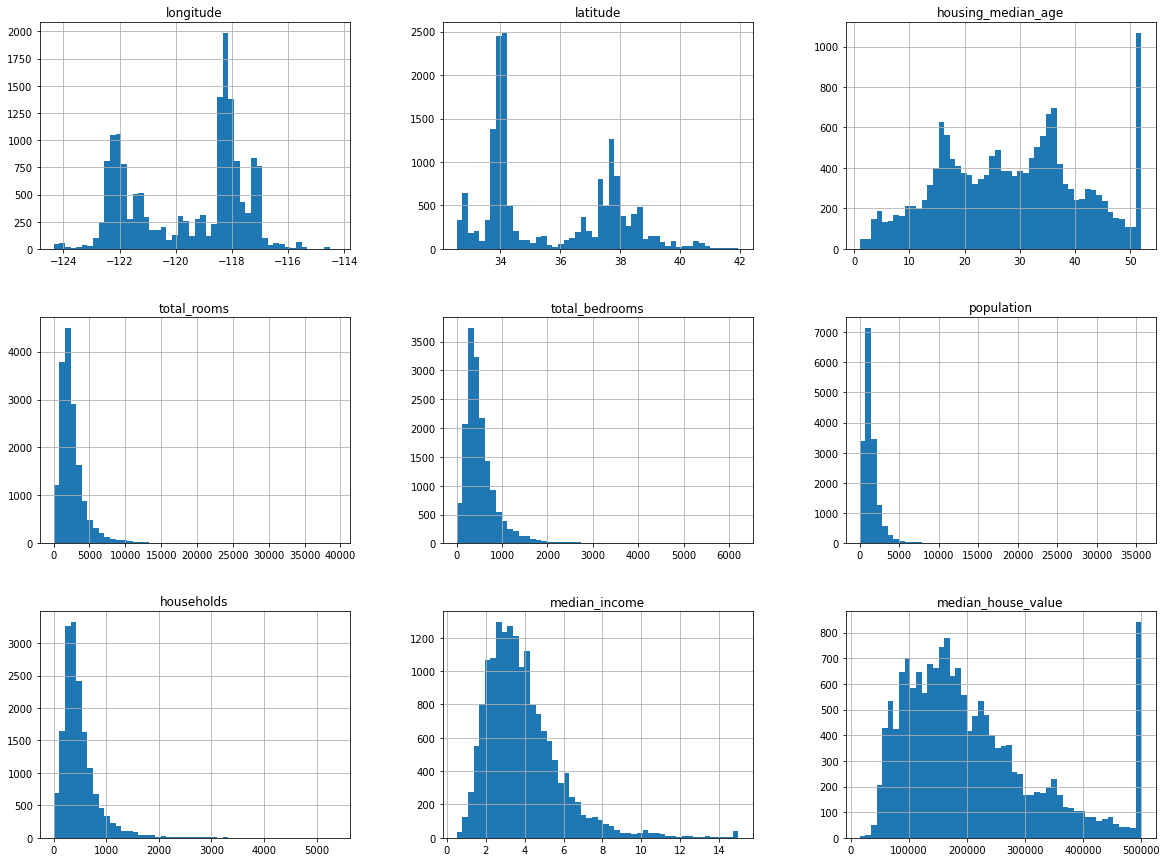

In [24]:
%matplotlib inline
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [25]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


<AxesSubplot:>

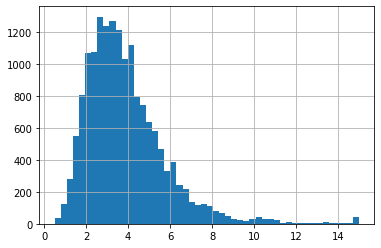

In [26]:
df1.median_income.hist(bins=50)

### Correlations Matrices

In [27]:
corr_matrix = df1.corr()

In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [29]:
import seaborn as sns

<AxesSubplot:>

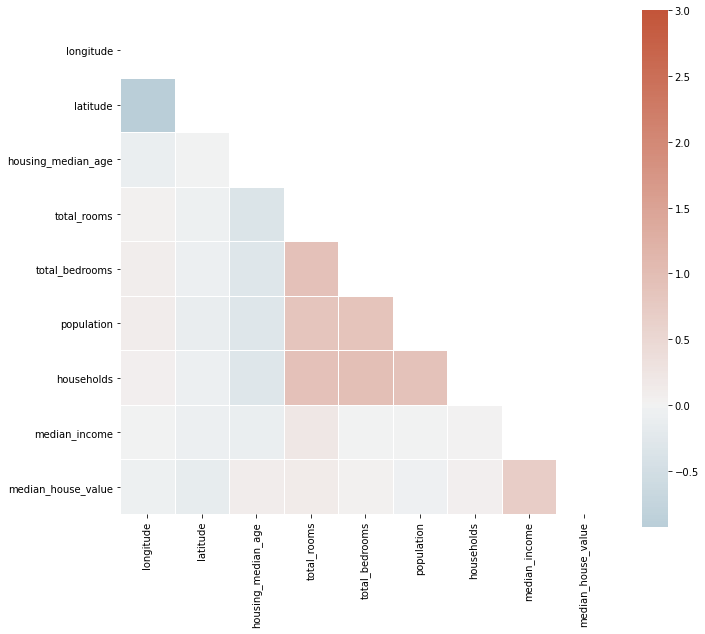

In [30]:
corr = df1.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))

f, ax = plt.subplots(figsize = (11,19))
cmap = sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(corr, mask=mask,cmap=cmap,vmax =3,center =0,square =True,linewidth =.5,cbar_kws={"shrink":.5})

### Observations::

As we know that this correlation coefficient (You can go to my video, where I have explained about this oin detail thorugh the link given below for deeper understanding) works from +1 to -1, which means +1 is the directly propotional to the given feature while inversely propotional in other case. Imp observations are:

1. Median_house_value has strong +ve relationship with median_income.
2. households has strong +ve relationship with total_rooms,total_bedrooms and population feature.

### Keeping all these in mind, Preparing data for Machine learning Algorithm ....!!!!

In [31]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [32]:
#again taking X and y

X = strat_train_set.drop(['median_income_cat','median_house_value'],axis =1)
y = strat_train_set['median_house_value']

### Now there are 4 things which we need to taken care of:

1. Feature Engineering: Which means create new informative columns from existing columns using domain knowldge

2. Imputation: Insert values inplace of missing values

3. Encoding categorical Data: Transforming categorical data into some numerical variations

4. Scaling: Apply a scaler that transform all of our data on numerical scale

In [33]:
## Starting with imputing values inplace of nan values:

### We can cater it through 1. remove rows having nan values or impute mean/median/mode inplace of Nans

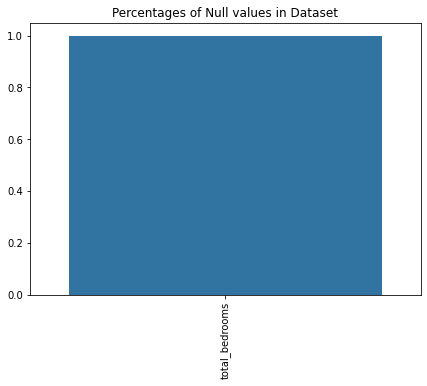

<AxesSubplot:title={'center':'Percentages of Null values in Dataset'}>

In [34]:
# We will be imputing median values.

def plotNull(dataset):
    null_Values = (dataset.isnull().sum() / len(dataset)) * 100
    try:
    # droping columns having null percentage to 0
        null_Values = round(null_Values.drop(null_Values[null_Values == 0].index)).sort_values(ascending =
        False)
        # plotting the bar plot of NULL %
        plt.figure(figsize = (7,5))
        null_plot = sns.barplot(x = null_Values.index , y = null_Values)
        plt.xticks(rotation = "90")
        plt.title("Percentages of Null values in Dataset")
        plt.show()
    except:
        print("There is NO null values in the dataset")
        print("Returning the dataset....")
        return dataset
    return null_plot
plotNull(X)

In [35]:
## total bedrooms only have null values; 158 of them

X.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [37]:
housing_num = df1.select_dtypes(include=[np.number])
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0


In [38]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
X = imputer.transform(housing_num)

In [40]:
X

array([[-1.21890e+02,  3.72900e+01,  3.80000e+01, ...,  3.39000e+02,
         2.70420e+00,  2.86600e+05],
       [-1.21930e+02,  3.70500e+01,  1.40000e+01, ...,  1.13000e+02,
         6.42140e+00,  3.40600e+05],
       [-1.17200e+02,  3.27700e+01,  3.10000e+01, ...,  4.62000e+02,
         2.86210e+00,  1.96900e+05],
       ...,
       [-1.16400e+02,  3.40900e+01,  9.00000e+00, ...,  7.65000e+02,
         3.27230e+00,  9.78000e+04],
       [-1.18010e+02,  3.38200e+01,  3.10000e+01, ...,  3.56000e+02,
         4.06250e+00,  2.25900e+05],
       [-1.22450e+02,  3.77700e+01,  5.20000e+01, ...,  6.39000e+02,
         3.57500e+00,  5.00001e+05]])

In [41]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index )
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0


In [42]:

housing_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

### Encode Categorical Variables

There are different encoding techniques to encode categorical data for e.g. Onehot encoding, mean encoding, Ordinal Encoding.

But for this project we will be using OHE because this is not a very big data set column wise we can afford more columns

In [43]:
housing_cat = df1[['ocean_proximity']]

In [44]:
from sklearn.preprocessing import OneHotEncoder


cat_encoder = OneHotEncoder(sparse =False)
housing_1hot = cat_encoder.fit_transform(housing_cat)

In [45]:
housing_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [46]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Feature Engineering

Feature engineering is the science of using domain knowldge to create new features (columns) of data using raw data. This can be key to improving the performance of your machine learning models.

In [47]:
def feature_engineer(data):
    data['Bedrooms_per_household'] = data['total_bedrooms'] / data['households'] 
    data['population_per_household'] = data['population'] / data['households']
    data['rooms_per_household'] = data['total_rooms'] / data['households']
    
    return data

In [48]:
housing_feature_engineering = feature_engineer(housing_num)
housing_feature_engineering

c:\users\affan\.conda\envs\newenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Bedrooms_per_household,population_per_household,rooms_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,1.035398,2.094395,4.625369
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,0.955752,2.707965,6.008850
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,1.019481,2.025974,4.225108
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,1.050992,4.135977,5.232295
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,1.042379,3.047847,4.505810
...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,1.123810,2.728571,6.052381
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,1.139535,4.077519,4.635659
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,1.139869,2.742484,6.346405
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,1.067416,3.808989,5.505618


## Scaling Our Data

Many machine learning algorithms wont work well with unscaled data, So in order to get generalize model out of this data we will have to scale our data

In [50]:
from sklearn.preprocessing  import StandardScaler

scaler = StandardScaler() 
housing_scaled = scaler.fit_transform(housing_feature_engineering)
housing_scaled



array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.12461343,
        -0.08649871, -0.31205452],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.28097679,
        -0.03353391,  0.21768338],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.15586354,
        -0.09240499, -0.46531516],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.08048715,
        -0.03055414,  0.3469342 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.06175575,
         0.06150916,  0.02499488],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.0619974 ,
        -0.09586294, -0.22852947]])

In [ ]:
housing = strat_train_set.drop("median_house_value")
housing_labels = strat_train_set["median_house_value"].copy()

## Pipelines !!!!

In [55]:
def data_transform_pipeline(data):
    
    if "median_house_value" in data.columns:
        labels =data['median_house_value']
        data = data.drop("median_house_value", axis =1)
    else:
        labels = None
        
    
    ## Feature Engineering
    
    feature_engineered_data  = feature_engineer(data)
    features = list(feature_engineered_data.columns)
    
    ## Imputing Data
    
    Imputer = SimpleImputer(strategy = "median")
    
    housing_num = feature_engineered_data.select_dtypes(include = [np.number])
    
    imputed = imputer.fit_transform(housing_num)
    
    ## Encoding Categorical Data
    
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])
    
    cat_encoder = OneHotEncoder(sparse = False)
    
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    
    features = features + cat_encoder.categories_[0].tolist()
    
    features.remove("ocean_proximity")
    
    ## Scaling
    
    scaler = StandardScaler() 
    
    housing_scaled = scaler.fit_transform(imputed)
    
    
    ### Concatenationg all Data ##
    
    output = np.hstack([housing_scaled, housing_cat_1hot])
    
    return output, labels, features 
    
    

### Select & Train Models ::::

In [56]:
train_data, train_labels, features = data_transform_pipeline(strat_train_set)
train_data

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  1.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  1.        ,
         0.        ,  0.        ]])

In [58]:
test_data, test_labels, features = data_transform_pipeline(strat_test_set)
test_data

array([[ 0.57471497, -0.69620912,  0.03285951, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.83839441, -0.86074221,  0.82471029, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24635944, -0.65390061, -0.12551065, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.52496413, -0.66800344,  0.19122966, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.10704893, -0.75732141, -0.12551065, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.31601062,  0.55894333, -0.75899128, ...,  1.        ,
         0.        ,  0.        ]])

In [59]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_income_cat',
 'Bedrooms_per_household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

## Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

lin_Reg = LinearRegression()
lin_Reg.fit(train_data,train_labels)

LinearRegression()

In [64]:
original_values = test_labels[:5]          #---------->>> Original/Expected Values in Test data

predicted_values = lin_Reg.predict(test_data[:5])   #--------------->>> Predicitons

In [66]:
Comparison_dataframe = pd.DataFrame(data={"Original Values": original_values, "Predicted Values": predicted_values})
Comparison_dataframe['Difference'] = Comparison_dataframe['Original Values'] - Comparison_dataframe['Predicted Values']

Comparison_dataframe

,Original Values,Predicted Values,Difference
5241,500001.0,430591.525619,69409.474381
10970,240300.0,261249.403082,-20949.403082
20351,218200.0,229058.999283,-10858.999283
6568,182100.0,195054.281794,-12954.281794
13285,121300.0,158453.778742,-37153.778742


## Measuring Results ::

In [69]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values,predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

37209.372959819615

In [70]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values,predicted_values)
lin_mae

30265.18745632063

#### Our Root Mean Squared Error is about 37,209, Its not a very accurate predictor, Lets model this data to Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor

treeReg = DecisionTreeRegressor(random_state=42)
treeReg.fit(train_data,train_labels)

DecisionTreeRegressor(random_state=42)

In [72]:
## Lets predict same data

original_values = test_labels[:5]          #---------->>> Original/Expected Values in Test data

predicted_values = treeReg.predict(test_data[:5])   #--------------->>> Predicitons

In [73]:
Comparison_dataframe = pd.DataFrame(data={"Original Values": original_values, "Predicted Values": predicted_values})
Comparison_dataframe['Difference'] = Comparison_dataframe['Original Values'] - Comparison_dataframe['Predicted Values']

Comparison_dataframe

,Original Values,Predicted Values,Difference
5241,500001.0,500001.0,0.0
10970,240300.0,304600.0,-64300.0
20351,218200.0,225000.0,-6800.0
6568,182100.0,184200.0,-2100.0
13285,121300.0,177200.0,-55900.0


In [74]:
Tree_mse = mean_squared_error(original_values,predicted_values)
Tree_rmse = np.sqrt(Tree_mse)
Tree_rmse

38235.97782194147

In [75]:
Tree_mae = mean_absolute_error(original_values,predicted_values)
Tree_mae

25820.0

## Cross Validation ::

In [76]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(treeReg, train_data, train_labels, scoring = "neg_mean_squared_error",cv = 10)
tree_rmse_score = np.sqrt(-scores)

In [78]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:", scores.mean())
    print("STD:",scores.std())

display_scores(tree_rmse_score)
    

Scores: [71266.79571236 69251.01425062 70782.00638678 74149.62095893
 69825.87952043 75609.26754058 71227.68299102 70521.16358535
 76582.46818853 69500.74110547]
Mean: 71871.6640240081
STD: 2486.2932474460663


### Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor

fores_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
fores_reg.fit(train_data,train_labels)

RandomForestRegressor(random_state=42)

In [82]:
train_predicitons = fores_reg.predict(train_data)


In [84]:
ForestTree_mse = mean_squared_error(train_labels,train_predicitons)
ForestTree_rmse = np.sqrt(ForestTree_mse)
ForestTree_rmse

18690.628462367946

### Now we got our results far better than 37,209 (Linaer Regression) to Random Forest's 18690.62 RMSE (Still without hyperparameters)

In [86]:
scores = cross_val_score(fores_reg, train_data, train_labels, scoring = "neg_mean_squared_error",cv = 10)
RandomForest_tree_rmse_score = np.sqrt(-scores)

In [87]:
display_scores(RandomForest_tree_rmse_score)

Scores: [49856.39856987 47351.25263944 49981.79207438 52766.70396575
 49713.13083236 53750.44635352 49110.704286   47849.84228632
 53468.8199134  50540.16199855]
Mean: 50438.92529195831
STD: 2113.091706507681


In [88]:
## SVM

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(train_data,train_labels)
housing_predictions = svm_reg.predict(train_data)

svm_mse = mean_squared_error(train_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110724.88160775298

In [ ]:
## This is good !!!

### Fine tune your model: Grid Search Or Randomized Search ::

In [89]:
## Fine tune Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [94]:
train_predicitons = grid_search.predict(train_data)

In [90]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [91]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [92]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65182.13076221845 {'max_features': 2, 'n_estimators': 3}
57465.44108962551 {'max_features': 2, 'n_estimators': 10}
54564.674908799345 {'max_features': 2, 'n_estimators': 30}
62390.62342224398 {'max_features': 4, 'n_estimators': 3}
55282.80807998184 {'max_features': 4, 'n_estimators': 10}
52466.03939426053 {'max_features': 4, 'n_estimators': 30}
61303.68671442677 {'max_features': 6, 'n_estimators': 3}
54015.68997360327 {'max_features': 6, 'n_estimators': 10}
51460.78733118658 {'max_features': 6, 'n_estimators': 30}
60412.75627053186 {'max_features': 8, 'n_estimators': 3}
53661.83245077935 {'max_features': 8, 'n_estimators': 10}
51448.70755405037 {'max_features': 8, 'n_estimators': 30}
63720.09121018065 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56286.32842111856 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62605.92589551954 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54564.39833332461 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [93]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.063960,0.003631,0.003398,4.898236e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.905988e+09,-4.237499e+09,...,-4.248710e+09,1.920434e+08,18,-1.147306e+09,-1.110145e+09,-1.140001e+09,-1.159958e+09,-1.142142e+09,-1.139911e+09,1.641670e+07
1,0.193881,0.001788,0.009794,1.164781e-03,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.137611e+09,-3.312484e+09,...,-3.302277e+09,1.319590e+08,11,-6.216071e+08,-6.022343e+08,-5.957915e+08,-6.275998e+08,-6.123041e+08,-6.119074e+08,1.177953e+07
2,0.651798,0.068378,0.027384,1.958963e-03,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.805553e+09,-3.036192e+09,...,-2.977304e+09,1.473404e+08,8,-4.604464e+08,-4.516947e+08,-4.473540e+08,-4.648261e+08,-4.581160e+08,-4.564875e+08,6.232950e+06
3,0.091144,0.002783,0.003598,4.896693e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.495132e+09,-4.141663e+09,...,-3.892590e+09,2.507104e+08,15,-1.042501e+09,-1.022615e+09,-1.015949e+09,-1.038527e+09,-1.041280e+09,-1.032174e+09,1.081243e+07
4,0.305410,0.012036,0.010394,4.895148e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.747113e+09,-3.179384e+09,...,-3.056189e+09,1.968675e+08,9,-5.612337e+08,-5.495048e+08,-5.475204e+08,-5.683397e+08,-5.598644e+08,-5.572926e+08,7.750225e+06
5,0.946815,0.036137,0.026384,1.198753e-03,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.564880e+09,-2.881626e+09,...,-2.752685e+09,1.477267e+08,3,-4.279131e+08,-4.170662e+08,-4.188756e+08,-4.254150e+08,-4.107080e+08,-4.199956e+08,6.134354e+06
6,0.120325,0.002331,0.003998,4.672031e-07,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.515113e+09,-3.784322e+09,...,-3.758142e+09,2.349885e+08,13,-9.527392e+08,-9.797345e+08,-1.011668e+09,-9.875966e+08,-9.814782e+08,-9.826432e+08,1.882033e+07
7,0.412545,0.023981,0.010594,1.019291e-03,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.721480e+09,-2.961508e+09,...,-2.917695e+09,1.688880e+08,5,-5.312460e+08,-5.302058e+08,-5.321541e+08,-5.466882e+08,-5.370842e+08,-5.354757e+08,6.082816e+06
8,1.145294,0.021500,0.025384,4.894342e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.482872e+09,-2.740798e+09,...,-2.648213e+09,1.608520e+08,2,-4.136838e+08,-4.050336e+08,-4.051027e+08,-4.134839e+08,-4.001491e+08,-4.074906e+08,5.289820e+06
9,0.145711,0.002134,0.003398,4.898430e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.551705e+09,-3.795404e+09,...,-3.649701e+09,1.134024e+08,12,-9.585035e+08,-9.606338e+08,-9.541477e+08,-1.012617e+09,-9.390745e+08,-9.649952e+08,2.497405e+07


## Feature Importance ::

In [99]:
##
feature_importances = grid_search.best_estimator_.feature_importances_ 

feature_importances

array([5.98520164e-02, 5.56180571e-02, 4.66062840e-02, 1.83866932e-02,
       1.69578902e-02, 1.70533882e-02, 1.70324927e-02, 2.64070110e-01,
       2.52167593e-02, 1.07124715e-01, 5.53818067e-02, 7.35979958e-03,
       1.24496178e-01, 1.50986585e-04, 2.79153401e-03, 5.47387720e-03,
       2.86304881e-03, 3.96556813e-02, 6.84792403e-03, 1.24003333e-02,
       1.14660424e-01])

In [100]:

feature_importance_list = list(zip(features,feature_importances.tolist()))
feature_importance_list

[('longitude', 0.059852016384141705),
 ('latitude', 0.05561805714469466),
 ('housing_median_age', 0.04660628398405185),
 ('total_rooms', 0.018386693192973792),
 ('total_bedrooms', 0.016957890173369627),
 ('population', 0.017053388227739913),
 ('households', 0.017032492704882485),
 ('median_income', 0.2640701101381051),
 ('median_income_cat', 0.02521675931486695),
 ('Bedrooms_per_household', 0.1071247146819002),
 ('population_per_household', 0.05538180667211382),
 ('rooms_per_household', 0.0073597995838399),
 ('<1H OCEAN', 0.1244961782693722),
 ('INLAND', 0.00015098658528528875),
 ('ISLAND', 0.0027915340065003892),
 ('NEAR BAY', 0.005473877197698571),
 ('NEAR OCEAN', 0.0028630488142887406)]

17

21

array([5.98520164e-02, 5.56180571e-02, 4.66062840e-02, 1.83866932e-02,
       1.69578902e-02, 1.70533882e-02, 1.70324927e-02, 2.64070110e-01,
       2.52167593e-02, 1.07124715e-01, 5.53818067e-02, 7.35979958e-03,
       1.24496178e-01, 1.50986585e-04, 2.79153401e-03, 5.47387720e-03,
       2.86304881e-03, 3.96556813e-02, 6.84792403e-03, 1.24003333e-02,
       1.14660424e-01])

In [114]:
ForestTree_mse_WithHyp = mean_squared_error(train_labels,train_predicitons)
ForestTree_WithHyp_rmse = np.sqrt(ForestTree_mse_WithHyp)
ForestTree_WithHyp_rmse

19795.758353667796

In [97]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

#X_test_prepared 
X_test_prepared, test_labels, features= data_transform_pipeline(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [98]:
final_rmse

67279.29310960919

In [128]:
## ****************************************************************************************************************************